In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

In [71]:
files = glob.glob('../Output/PCA/*.csv')
files.sort()
files.append(files.pop(files.index('../Output/PCA/Clustering_fit_time.csv')))

In [72]:
files = dict(enumerate(files))
files
#len(files)

{0: '../Output/PCA/BreastC Silhouette.csv',
 1: '../Output/PCA/BreastC acc.csv',
 2: '../Output/PCA/BreastC adjMI.csv',
 3: '../Output/PCA/BreastC2D.csv',
 4: '../Output/PCA/CreditCardF Silhouette.csv',
 5: '../Output/PCA/CreditCardF acc.csv',
 6: '../Output/PCA/CreditCardF adjMI.csv',
 7: '../Output/PCA/CreditCardF2D.csv',
 8: '../Output/PCA/SSE.csv',
 9: '../Output/PCA/logliklihood.csv',
 10: '../Output/PCA/Clustering_fit_time.csv'}

In [73]:
dfs = defaultdict(int)
for indx, f in files.items():
    dfs[indx] = pd.read_csv(f)

## Part 1: Clustering Analyses

K-means SSE - Both datasets:  **dfs[8]**

GMM Loglikelihood - Both datasets:  **dfs[9]**

Silhouette - BreastC:  **dfs[0]** 

acc - BreastC:  **dfs[1]**

adjMI - BreastC:  **dfs[2]**

Visualize dataset in 2D - Breast C:  **dfs[3]**

Silhouette - CCF:  **dfs[4]** 

acc - CCF:  **dfs[5]**

adjMI - CCF:  **dfs[6]**

Visualize dataset in 2D - CCF:  **dfs[7]**

In [74]:
km_SSE = dfs[8]
gmm_log = dfs[9]
bc_ss = dfs[0].T[1:]
bc_ari = dfs[1].T[1:]
bc_NMI = dfs[2].T[1:]
bc_2d = dfs[3]

ccf_ss = dfs[4].T[1:]
ccf_ari = dfs[5].T[1:]
ccf_NMI = dfs[6].T[1:]
ccf_2d = dfs[7]

In [75]:
time_file="../Clustering_fit_time_PCA.csv"
dfs[10]=pd.read_csv(time_file)
print(dfs[10].head(10))

    k  BC_kmean     BC_em  CCF_kmean    CCF_em
0   2  0.181217  0.052154   0.368311  0.062108
1   3  0.236860  0.016684   1.254033  0.163190
2   4  0.234483  0.012688   1.033618  0.218019
3   5  0.267866  0.015985   1.186245  0.221309
4   6  0.276521  0.020498   0.768454  0.191942
5   7  0.073645  0.021678   0.787469  0.261270
6   8  0.152378  0.017067   0.864494  0.201597
7   9  0.261261  0.026584   1.084932  0.276411
8  10  0.209083  0.027001   1.118985  0.197662


In [76]:
fit_time=dfs[10]
fit_time.columns=["k","BC_kmean","BC_EM", "CCF_kmean", "CCF_EM"]
bc_kmean_fit_time= fit_time["BC_kmean"]
bc_em_fit_time= fit_time["BC_EM"]
ccf_kmean_fit_time= fit_time["CCF_kmean"]
ccf_em_fit_time= fit_time["CCF_EM"]
cluster_number= fit_time["k"]

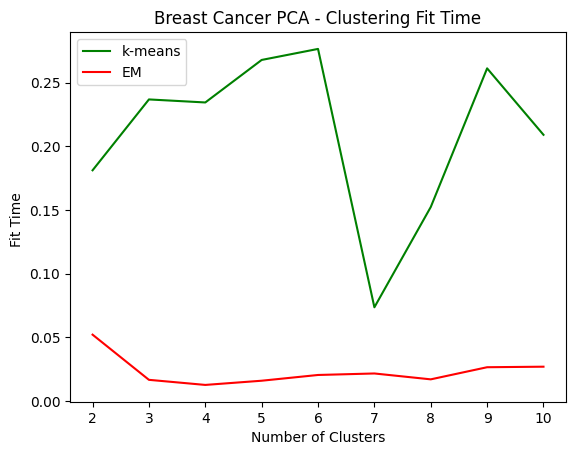

In [77]:
plt.plot(cluster_number,bc_kmean_fit_time, color="green", label= "k-means")
plt.plot(cluster_number,bc_em_fit_time, color="red", label="EM")

plt.ylabel("Fit Time ")
plt.xlabel("Number of Clusters")
plt.legend()
plt.title('Breast Cancer PCA - Clustering Fit Time')
plt.savefig('Breast Cancer PCA - Clustering Fit Time')

plt.show()

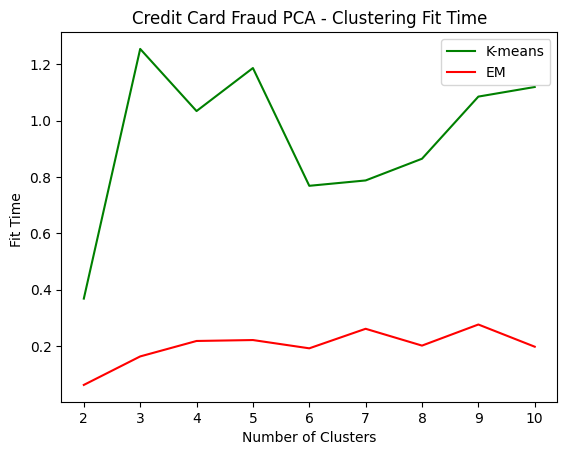

In [78]:
plt.plot(cluster_number,ccf_kmean_fit_time, color="green", label="K-means")
plt.plot(cluster_number,ccf_em_fit_time, color="red", label= "EM")

plt.ylabel("Fit Time ")
plt.xlabel("Number of Clusters")
plt.legend()
plt.title('Credit Card Fraud PCA - Clustering Fit Time')
plt.savefig('Credit Card Fraud PCA - Clustering Fit Time')

plt.show()

# Choosing K
## K-Means SSE: (Breast Cancer & Credit Card Fraud)

In [79]:
km_SSE.columns = ['clusters','ccf_sse', 'bc_sse']
x = km_SSE['clusters']
bc_y = km_SSE['bc_sse']
ccf_y = km_SSE['ccf_sse']
km_SSE.head()

,clusters,ccf_sse,bc_sse
0,2,8761.717933,2834.159303
1,3,8126.361742,2598.645366
2,4,7527.010638,2368.947049
3,5,7013.853490,2194.191496
4,6,6564.669696,2046.766724


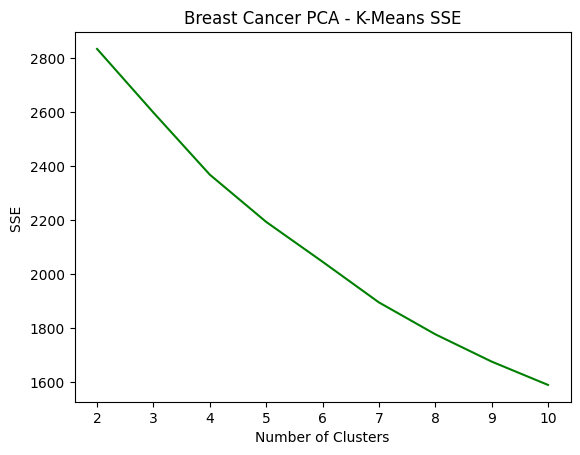

In [80]:
plt.plot(x,bc_y, color="green")
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer PCA - K-Means SSE')
plt.savefig('Breast Cancer PCA - K-Means SSE')
plt.show()



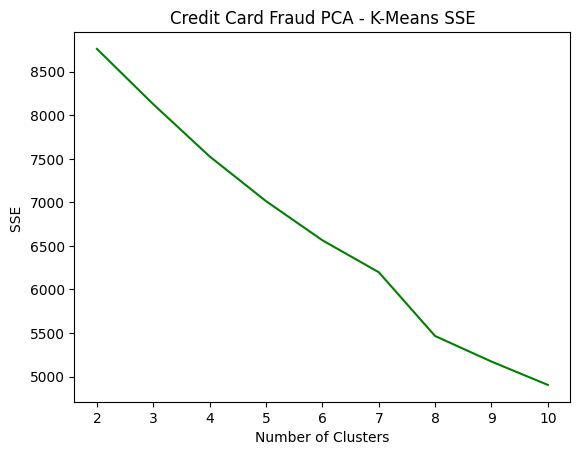

In [81]:
plt.plot(x,ccf_y, color="green")
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud PCA - K-Means SSE')
plt.savefig('Credit Card Fraud PCA - K-Means SSE')
plt.show()




## EM Log-Likelihood: (Breast Cancer & Credit Card Fraud)

In [82]:
gmm_log.columns = ['clusters','ccf_log', 'bc_log']
x = gmm_log['clusters']
bc_y = gmm_log['bc_log']
ccf_y = gmm_log['ccf_log']
gmm_log.head()

,clusters,ccf_log,bc_log
0,2,-13.349209,-9.204146
1,3,-11.194351,-8.642316
2,4,-9.544512,-8.485604
3,5,-8.974648,-8.442188
4,6,-8.604905,-8.218743


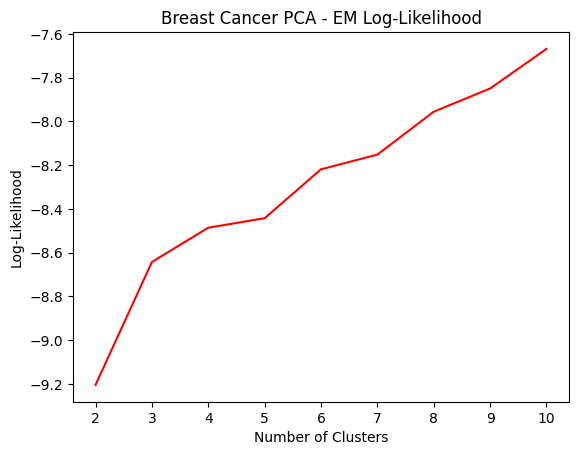

In [83]:
plt.plot(x,bc_y, color="red")
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer PCA - EM Log-Likelihood')
plt.savefig('Breast Cancer PCA - EM Log-Likelihood')


plt.show()



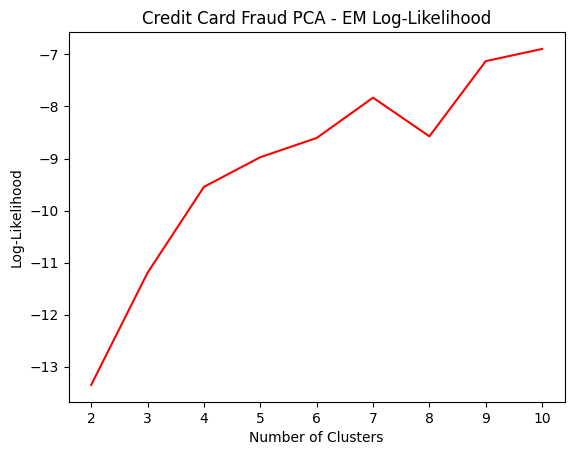

In [84]:
plt.plot(x,ccf_y, color="red")
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud PCA - EM Log-Likelihood')
plt.savefig('Credit Card Fraud PCA - EM Log-Likelihood')


plt.show()

# Breast Cancer Dataset

## Silhouette Score: K-Means and EM

In [85]:
bc_ss['clusters'] = bc_ss.index
bc_ss.columns = ['gmm_ss','km_ss','clusters']
x = bc_ss['clusters']
gmm_y = bc_ss['gmm_ss']
km_y = bc_ss['km_ss']
bc_ss.head()

,gmm_ss,km_ss,clusters
2,0.163082,0.165824,2
3,0.057386,0.136651,3
4,0.09509,0.135473,4
5,0.093344,0.13702,5
6,0.080809,0.146988,6


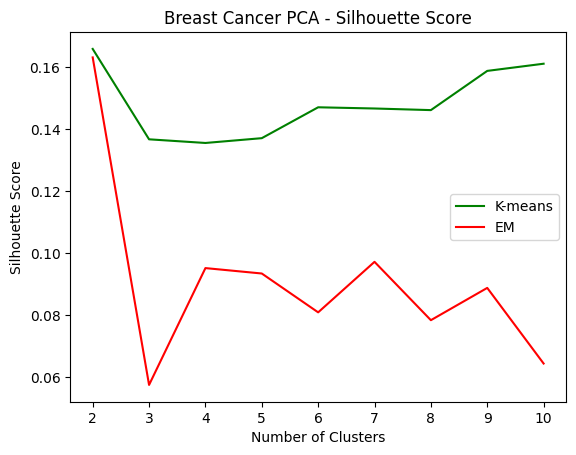

In [86]:
plt.plot(x,km_y, label="K-means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer PCA - Silhouette Score')
plt.legend()
plt.savefig('Breast Cancer PCA - Silhouette Score')


plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [87]:
bc_ari['clusters'] = bc_ari.index
bc_ari.columns = ['gmm_ari','km_ari','clusters']
x = bc_ari['clusters']
gmm_y = bc_ari['gmm_ari']
km_y = bc_ari['km_ari']
bc_ari.head()

,gmm_ari,km_ari,clusters
2,0.822621,0.838726,2
3,0.301702,0.653608,3
4,0.760178,0.541309,4
5,0.67069,0.62632,5
6,0.670807,0.759635,6


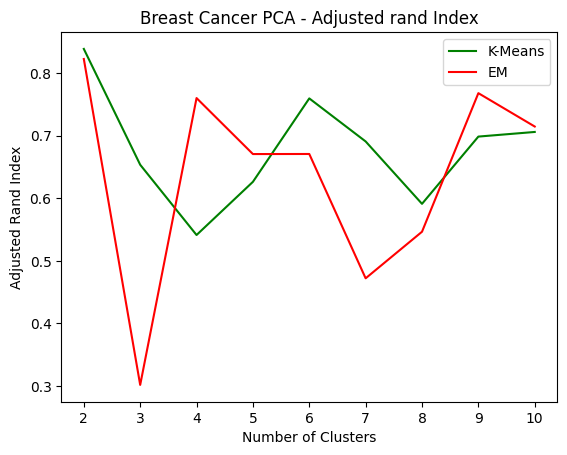

In [88]:
plt.plot(x,km_y, label = "K-Means", color="green")
plt.plot(x,gmm_y, label = "EM", color="red")
plt.ylabel("Adjusted Rand Index")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer PCA - Adjusted rand Index')
plt.legend()
plt.savefig('Breast Cancer PCA - Adjusted rand Index')


plt.show()

## Adjusted MI: K-Means and EM

In [89]:
bc_NMI['clusters'] = bc_NMI.index
bc_NMI.columns = ['gmm_NMI','km_NMI','clusters']
x = bc_NMI['clusters']
gmm_y = bc_NMI['gmm_NMI']
km_y = bc_NMI['km_NMI']

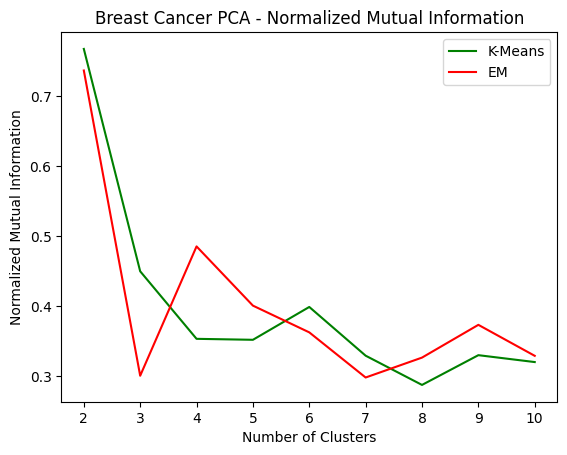

In [90]:
plt.plot(x,km_y, label="K-Means", color='green')
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Normalized Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer PCA - Normalized Mutual Information')
plt.legend()
plt.savefig('Breast Cancer PCA - Normalized Mutual Information')


plt.show()

# Credit Card Fraud Dataset

## Silhouette Score: K-Means and EM

In [91]:
ccf_ss['clusters'] = ccf_ss.index
ccf_ss.columns = ['gmm_ss','km_ss','clusters']
x = ccf_ss['clusters']
gmm_y = ccf_ss['gmm_ss']
km_y = ccf_ss['km_ss']
ccf_ss.head()

,gmm_ss,km_ss,clusters
2,0.247151,0.647843,2
3,0.077319,0.105588,3
4,0.102536,0.104117,4
5,0.013073,0.131482,5
6,0.059209,0.133496,6


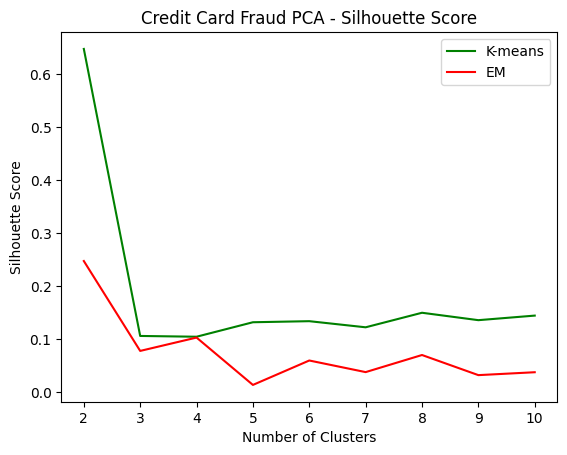

In [92]:
plt.plot(x,km_y, label="K-means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud PCA - Silhouette Score')
plt.legend()
plt.savefig('Credit Card Fraud PCA - Silhouette Score')


plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [93]:
ccf_ari['clusters'] = ccf_ari.index
ccf_ari.columns = ['gmm_ari','km_ari','clusters']
x = ccf_ari['clusters']
gmm_y = ccf_ari['gmm_ari']
km_y = ccf_ari['km_ari']
ccf_ari.head()

,gmm_ari,km_ari,clusters
2,0.117881,0.000097,2
3,0.235879,0.002,3
4,0.233413,0.114462,4
5,0.316054,0.132321,5
6,0.253538,0.178295,6


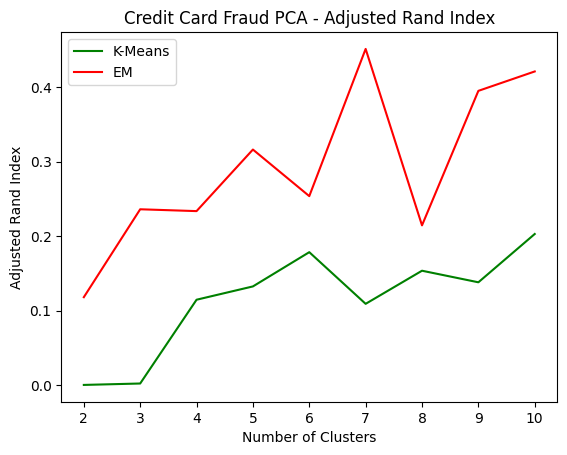

In [94]:
plt.plot(x,km_y, label = "K-Means", color="green")
plt.plot(x,gmm_y, label = "EM", color="red")
plt.ylabel("Adjusted Rand Index")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud PCA - Adjusted Rand Index')
plt.legend()
plt.savefig('Credit Card Fraud PCA - Adjusted rand Index')


plt.show()

## Adjusted MI: K-Means and EM

In [95]:
ccf_NMI['clusters'] = ccf_NMI.index
ccf_NMI.columns = ['gmm_NMI','km_NMI','clusters']
x = ccf_NMI['clusters']
gmm_y = ccf_NMI['gmm_NMI']
km_y = ccf_NMI['km_NMI']

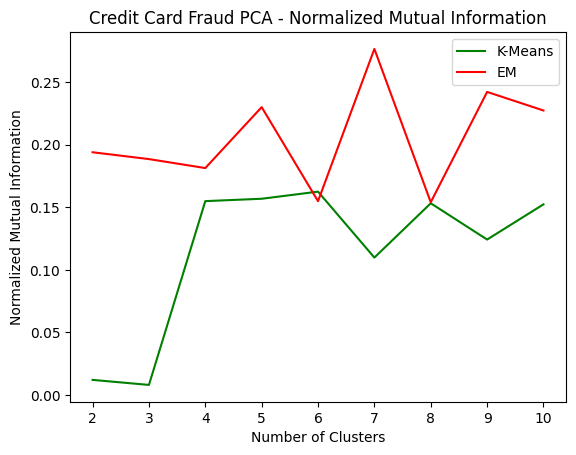

In [96]:
plt.plot(x,km_y, label="K-Means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Normalized Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud PCA - Normalized Mutual Information')
plt.legend()
plt.savefig('Credit Card Fraud PCA - Normalized Mutual Information')


plt.show()

## 2D Visualizaion

In [97]:
# f_2d.columns = ['data','x','y','target']
# f_2d.head()

## PCA Analyses

In [98]:
files1 = glob.glob('../Output/PCA/PCA/*scree.csv')
files1.sort()

In [99]:
files1 = dict(enumerate(files1))
files1

{0: '../Output/PCA/PCA/bc scree.csv', 1: '../Output/PCA/PCA/ccf scree.csv'}

In [100]:
dfs1 = defaultdict(int)
for indx, f in files1.items():
    dfs1[indx] = pd.read_csv(f,names = ["Components","Variation"])

In [101]:
# bc_cluster = dfs1[0]
bc_scree = dfs1[0][1:15]
# f_cluster = dfs1[2]
ccf_scree = dfs1[1][1:15]

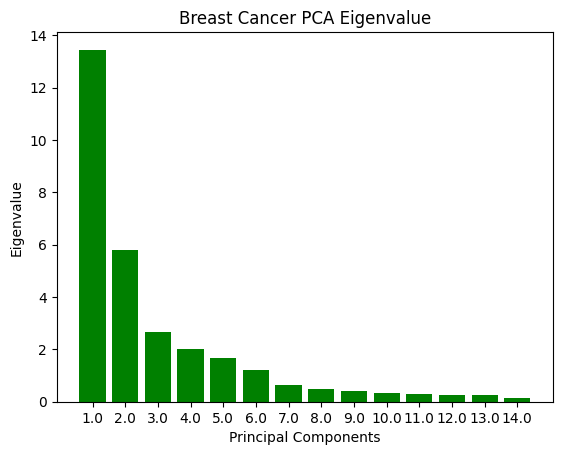

In [102]:
height = bc_scree["Variation"]
bars = bc_scree["Components"]
y_pos = np.arange(len(bars))
plt.ylabel("Eigenvalue")
plt.xlabel("Principal Components")
plt.title('Breast Cancer PCA Eigenvalue')
plt.bar(y_pos,height, color="green")
plt.xticks(y_pos, bars)
plt.savefig('Breast Cancer PCA Eigenvalue')


plt.show()

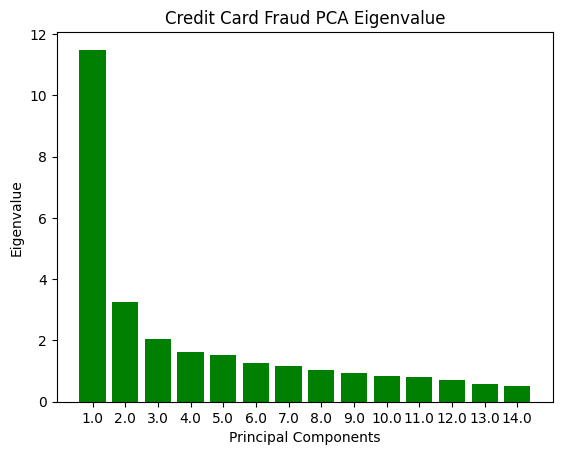

In [103]:
height = ccf_scree["Variation"]
bars = ccf_scree["Components"]
y_pos = np.arange(len(bars))
plt.ylabel("Eigenvalue")
plt.xlabel("Principal Components")
plt.title('Credit Card Fraud PCA Eigenvalue')
plt.bar(y_pos,height, color="green")
plt.xticks(y_pos, bars)
plt.savefig('Credit Card Fraud PCA Eigenvalue')


plt.show()

## Dimensional Reduction Neural Network

In [104]:
files2 = glob.glob('../Output/PCA/PCA/*red.csv')
files2.sort()

files2 = dict(enumerate(files2))
files2

dfs2 = defaultdict(int)
for indx, f in files2.items():
    dfs2[indx] = pd.read_csv(f)

In [105]:
files2

{0: '../Output/PCA/PCA/bc dim red.csv', 1: '../Output/PCA/PCA/ccf dim red.csv'}

In [106]:
bc_cl = dfs2[0]
f_cl = dfs2[1]

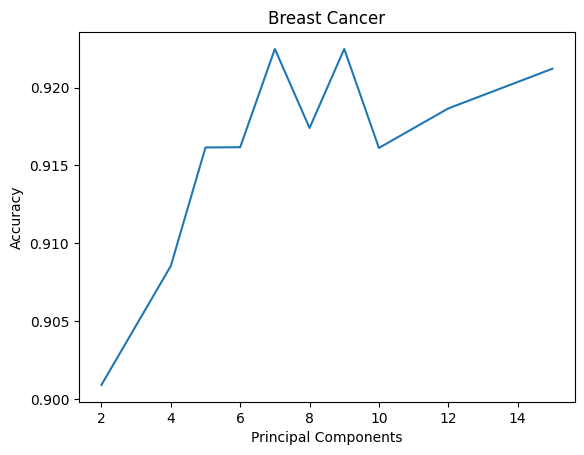

In [107]:
x = f_cl["param_pca__n_components"]
y = f_cl["mean_test_score"]

plt.plot(x,y)
plt.ylabel("Accuracy")
plt.xlabel("Principal Components")
plt.title('Breast Cancer')
plt.show()